In [140]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

heatmap_image = Image.open("heatmap.png")
legend_image  = Image.open("legend.png")

field_dims  = [4, 23]
legend_lims = [0.01, -0.01]

Sample colour values from legend (assume it is vertical)

In [141]:
nSamples = 100
xval = legend_image.size[0]//2
legend_image_px = legend_image.load()

colourvals = []
for yval, legend_value in zip(np.linspace(1, legend_image.size[1]-1, num=nSamples), np.linspace(legend_lims[0], legend_lims[1], num=nSamples)):
    colourvals.append([legend_image_px[xval, int(yval)], legend_value])
colourvals = np.array(colourvals)

In [142]:
heatmap_image_px = heatmap_image.load()
heatmap_height, heatmap_width = heatmap_image.size

def rgba_difference(tuple1, tuple2):
    deltaR = tuple1[0] - tuple2[0]
    deltaG = tuple1[1] - tuple2[1]
    deltaB = tuple1[2] - tuple2[2]
    deltaAlpha = tuple1[3] - tuple2[3]
    rgbDistanceSquared = (deltaR * deltaR + deltaG * deltaG + deltaB * deltaB) / 3
    return deltaAlpha * deltaAlpha / 2.0 + rgbDistanceSquared * tuple1[3] * tuple2[3] / (255 * 255)

def colordifference_ch(x, y, alphas):
    # maximum of channel blended on white, and blended on black
    # premultiplied alpha and backgrounds 0/1 shorten the formula
    black = x-y
    white = black+alphas
    return max(black*black, white*white)

def stdc_difference(tuple1, tuple2):
    alphas = tuple2[3]-tuple1[3];
    return colordifference_ch(tuple1[0], tuple2[0], alphas) + colordifference_ch(tuple1[1], tuple2[1], alphas) + colordifference_ch(tuple1[2], tuple2[2], alphas)

heatmap_vals = np.zeros(field_dims)
pixelvals=[]
for x in range(field_dims[0]):
    for y in range(field_dims[1]):
        colour = heatmap_image_px[int(heatmap_height/field_dims[1] * (y+0.5)), int(heatmap_width/field_dims[0] * (x+0.5))]
        colour_diffs = [rgba_difference(colourvals[i,0], colour) for i in range(colourvals.shape[0])]
        heatmap_vals[x,y] = colourvals[np.argmin(colour_diffs), 1]
        
print(heatmap_vals)

[[ 0.00131313 -0.00292929 -0.00979798 -0.00313131 -0.00393939 -0.00656566
  -0.00353535 -0.00393939 -0.00191919 -0.00191919 -0.00151515 -0.00111111
  -0.00010101 -0.00030303  0.00333333  0.00252525  0.00717172  0.00555556
   0.00353535  0.00979798  0.00535354  0.00090909 -0.00151515]
 [-0.00494949 -0.00111111 -0.00494949 -0.00434343 -0.00070707  0.00030303
  -0.00070707 -0.00010101 -0.00050505 -0.00010101 -0.00010101  0.00030303
   0.00171717  0.00131313  0.00474747  0.00414141  0.00959596  0.00959596
   0.00555556  0.00535354  0.00434343  0.00171717 -0.00151515]
 [ 0.00252525  0.00232323  0.00393939  0.00151515  0.00090909 -0.00030303
  -0.00232323 -0.00212121 -0.00353535 -0.00111111 -0.00151515 -0.00030303
  -0.00010101  0.00151515  0.00151515  0.00232323  0.00494949  0.00676768
   0.00717172  0.00636364  0.00535354  0.00535354 -0.00151515]
 [ 0.00393939  0.00050505 -0.00050505  0.00090909 -0.00434343 -0.00151515
  -0.00434343 -0.00313131 -0.00313131 -0.00252525 -0.00191919 -0.000909

Save heatmap_vals

In [143]:
import pickle
pickle.dump(heatmap_vals, open("heatmap_vals.pickle", "wb"))

Plot heatmap to check

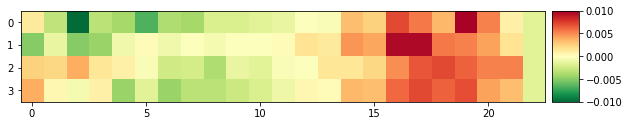

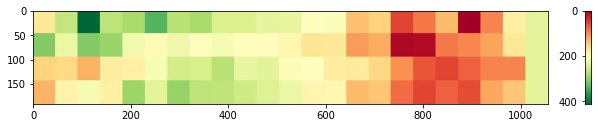

In [144]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# extracted heatmap
plt.figure(figsize=(10,5))
heatmap = plt.imshow(heatmap_vals, cmap='RdYlGn_r', vmin=legend_lims[0], vmax=legend_lims[1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.gcf().colorbar(heatmap, cax=cax, orientation='vertical')
plt.show()
plt.close()

# loaded (original) heatmap
plt.figure(figsize=(10.4,5))
heatmap = plt.imshow(np.asarray(heatmap_image))
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', size='10%', pad=0.2)
cax.imshow(np.asarray(legend_image))
cax.set_xticks([])
plt.show()
plt.close()